In [4]:
#python project
#trade&ahead
#load libraries

In [38]:
#loading up the data
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA


#format numeric data for easier readability
pd.set_option(
    "display.float_format", lambda x: "%.2f" % x
)  # to display numbers rounded off to 2 decimal places

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [39]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="viridis",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [40]:
# function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(16, 6), kde=False, bins=None, hue=None):
    """
    Combines boxplot and histogram

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (16,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True,
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter",
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [8]:
data=pd.read_csv('stock_data.csv')

In [9]:
data

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines      42.349998      9.999995    1.687151   
1                 Pharmaceuticals      59.240002      8.339433    2.197887   
2           Health Care Equipment      44.910000     11.301121    1.273646   
3            Application Software      93.940002     13.977195    1.357679   
4                  Semiconductors      55.320000     -1.827858    1.701169   
..                            ...            ...           ...         ...   
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    135          51     -604000000  7610000000               11.39   
1    130          77       51000000  5144000000                3.15   
2     21          67      938000000  4423000000                2.94   
3      9         180     -240840000   629551000                1.26   
4     14         272      315120000   696878000                0.31   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                    6.681299e+08    3.718174  -8.784219  
1                    1.633016e+09   18.806350  -8.750068  
2                    1.504422e+09   15.275510  -0.394171  
3                    4.996437e+08   74.555557   4.199651  
4                    2.247994e+09  178.451613   1.059810  
..                            ...         ...        ...  
335                  9.394573e+08   28.976191   6.261775  
336                  4.353535e+08   17.682214  -3.838260  
337                  1.884615e+08  131.525636 -23.884449  
338                  2.578925e+08   22.749999  -0.063096  
339                  4.985294e+08   70.470585   1.723068  

[340 rows x 15 columns]

In [10]:
#see the attributes of the data

In [11]:
data.describe().T

count          mean           std           min  \
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00   
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%  \
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01   
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

In [12]:
data

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines      42.349998      9.999995    1.687151   
1                 Pharmaceuticals      59.240002      8.339433    2.197887   
2           Health Care Equipment      44.910000     11.301121    1.273646   
3            Application Software      93.940002     13.977195    1.357679   
4                  Semiconductors      55.320000     -1.827858    1.701169   
..                            ...            ...           ...         ...   
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    135          51     -604000000  7610000000               11.39   
1    130          77       51000000  5144000000                3.15   
2     21          67      938000000  4423000000                2.94   
3      9         180     -240840000   629551000                1.26   
4     14         272      315120000   696878000                0.31   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                    6.681299e+08    3.718174  -8.784219  
1                    1.633016e+09   18.806350  -8.750068  
2                    1.504422e+09   15.275510  -0.394171  
3                    4.996437e+08   74.555557   4.199651  
4                    2.247994e+09  178.451613   1.059810  
..                            ...         ...        ...  
335                  9.394573e+08   28.976191   6.261775  
336                  4.353535e+08   17.682214  -3.838260  
337                  1.884615e+08  131.525636 -23.884449  
338                  2.578925e+08   22.749999  -0.063096  
339                  4.985294e+08   70.470585   1.723068  

[340 rows x 15 columns]

In [13]:
import numpy as np
import seaborn as sns

In [14]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [15]:
data.shape

(340, 15)

In [16]:
df=data.copy()

In [17]:
df

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines      42.349998      9.999995    1.687151   
1                 Pharmaceuticals      59.240002      8.339433    2.197887   
2           Health Care Equipment      44.910000     11.301121    1.273646   
3            Application Software      93.940002     13.977195    1.357679   
4                  Semiconductors      55.320000     -1.827858    1.701169   
..                            ...            ...           ...         ...   
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    135          51     -604000000  7610000000               11.39   
1    130          77       51000000  5144000000                3.15   
2     21          67      938000000  4423000000                2.94   
3      9         180     -240840000   629551000                1.26   
4     14         272      315120000   696878000                0.31   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                    6.681299e+08    3.718174  -8.784219  
1                    1.633016e+09   18.806350  -8.750068  
2                    1.504422e+09   15.275510  -0.394171  
3                    4.996437e+08   74.555557   4.199651  
4                    2.247994e+09  178.451613   1.059810  
..                            ...         ...        ...  
335                  9.394573e+08   28.976191   6.261775  
336                  4.353535e+08   17.682214  -3.838260  
337                  1.884615e+08  131.525636 -23.884449  
338                  2.578925e+08   22.749999  -0.063096  
339                  4.985294e+08   70.470585   1.723068  

[340 rows x 15 columns]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [19]:
df.duplicated().sum()

0

In [20]:
#no duplicates

In [21]:
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa

In [23]:
#EDA

In [24]:
df.describe(include='category').T

count unique                                 top freq
Ticker Symbol       340    340                                 AAL    1
Security            340    340                          3M Company    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="viridis",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

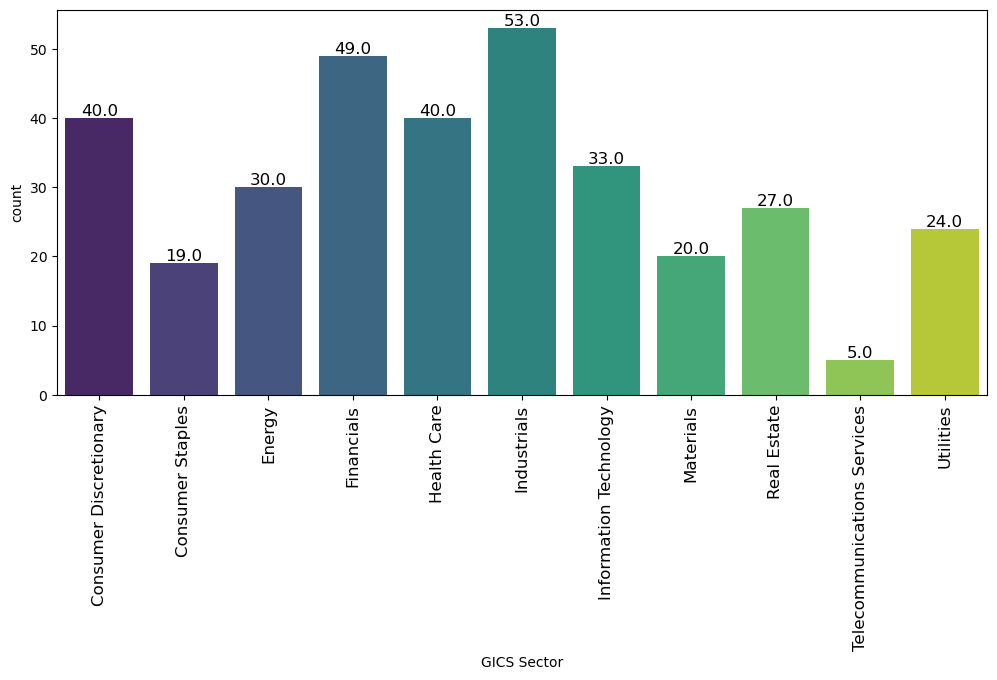

In [26]:
labeled_barplot(df,'GICS Sector')

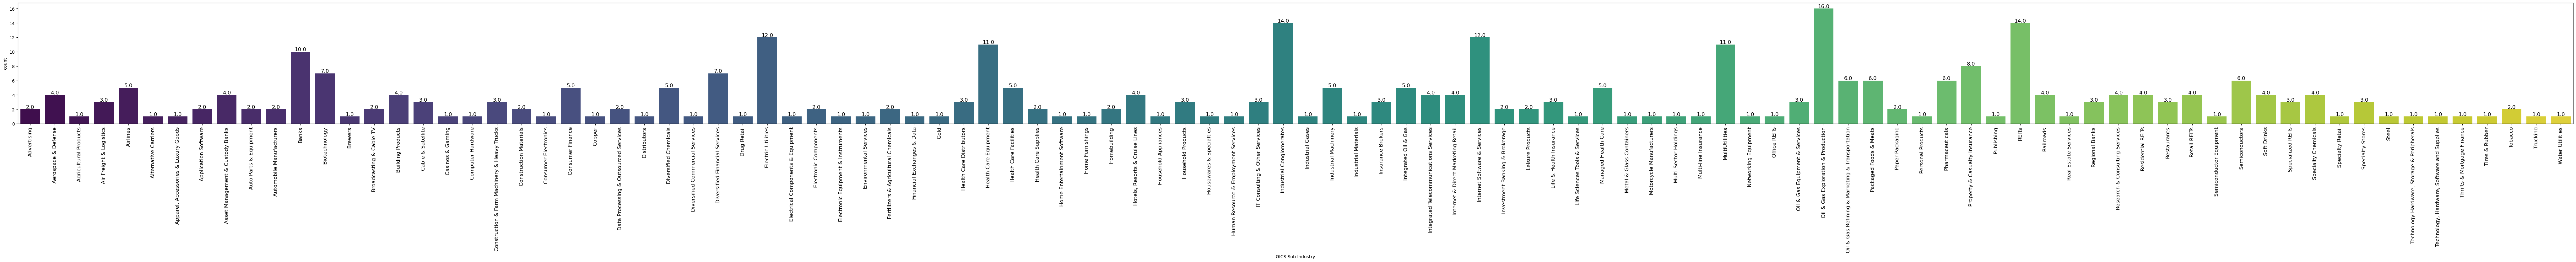

In [27]:
labeled_barplot(df,'GICS Sub Industry')

In [28]:
df['GICS Sub Industry'].value_counts()

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
                                      ..
Metal & Glass Containers               1
Motorcycle Manufacturers               1
Multi-Sector Holdings                  1
Multi-line Insurance                   1
Water Utilities                        1
Name: GICS Sub Industry, Length: 104, dtype: int64

#The stocks are drawn from 11 different industrial sectors, with no one sector comprising more than 16% of the dataset
#The top 4 of the 11 sectors (industrials, financials, consumer discretionary, and health care) comprise over half of the total number of stocks


 ## GICS Sub Industry



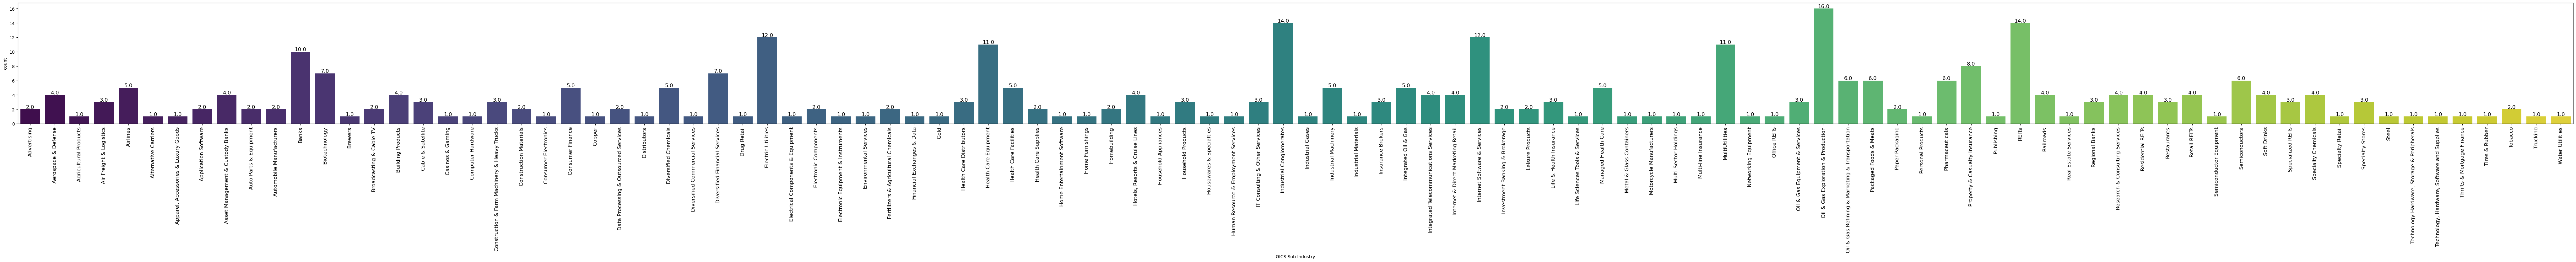

In [30]:
#create labeled barplot of stocks by sub industry
labeled_barplot(df, 'GICS Sub Industry')

In [31]:
#display the five sub industries with the most number of stocks
df['GICS Sub Industry'].value_counts().head(n=5)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
Name: GICS Sub Industry, dtype: int64

The dataset is comprised of stocks from 104 different subindustries, with no subindustry having more than 16 stocks in the dataset
These observations indicate that the 340 stocks held within the dataset are highly diversified across sectors and subindustries


In [32]:
#provide statistical summary of all numerical columns
df.describe().T

count          mean           std           min  \
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00   
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%  \
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01   
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

Numerical Columns



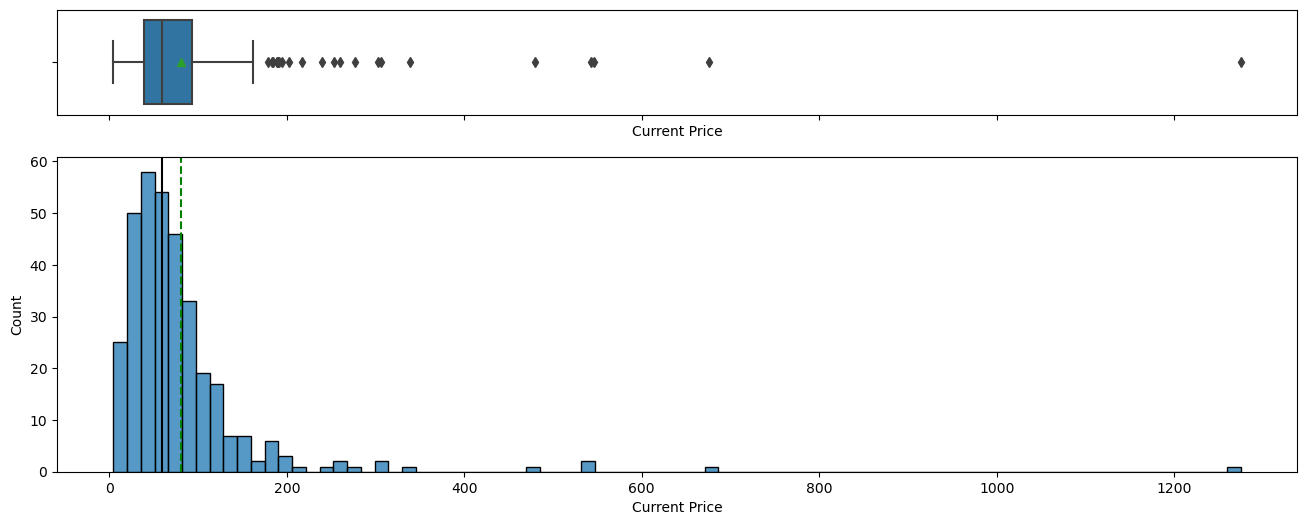

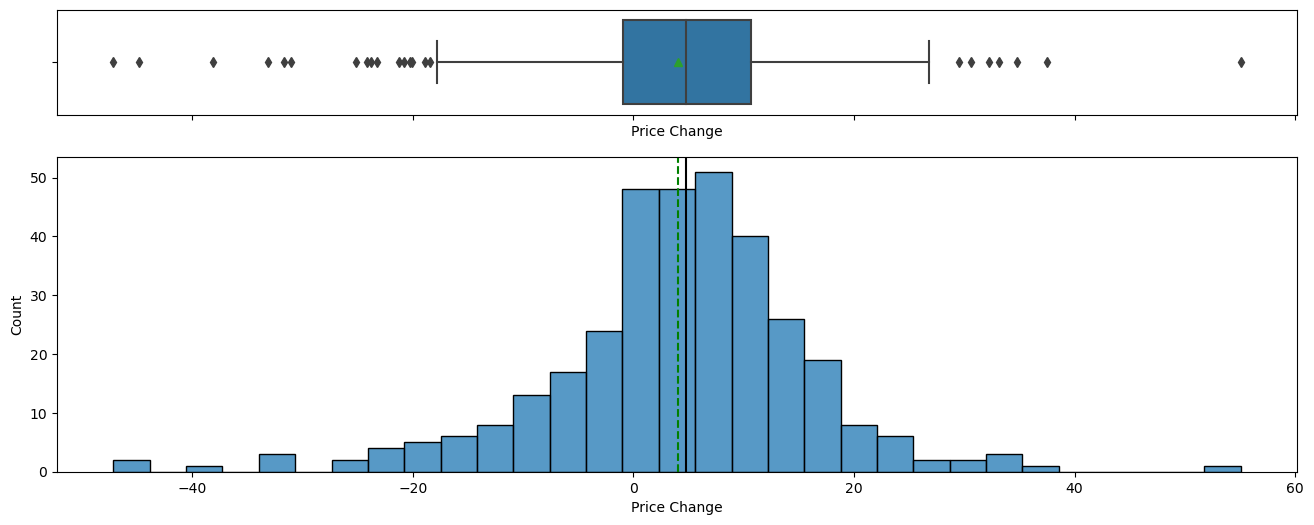

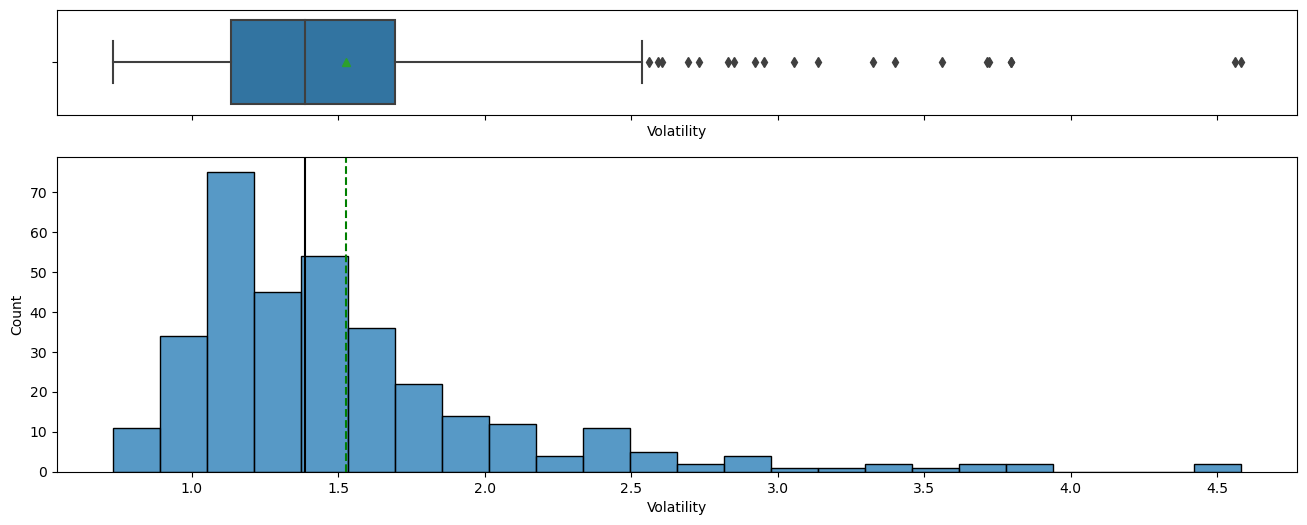

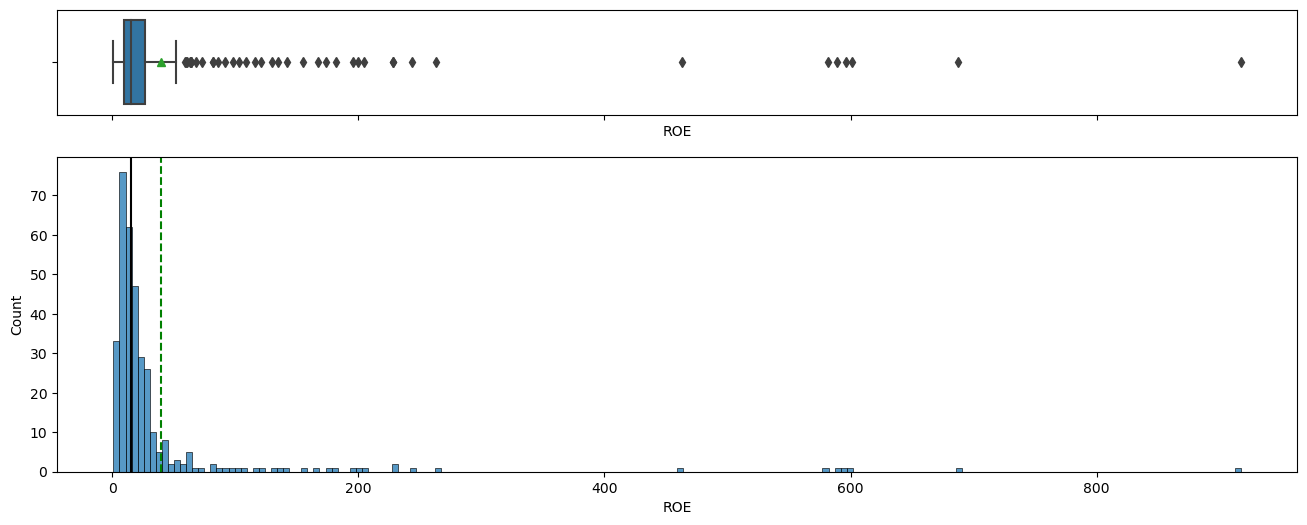

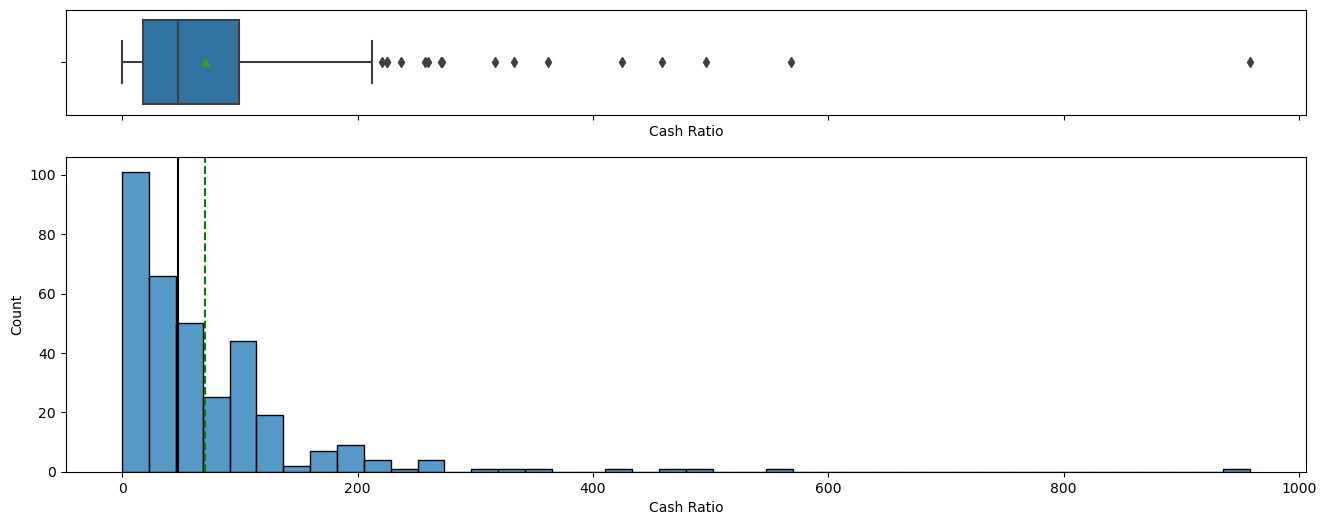

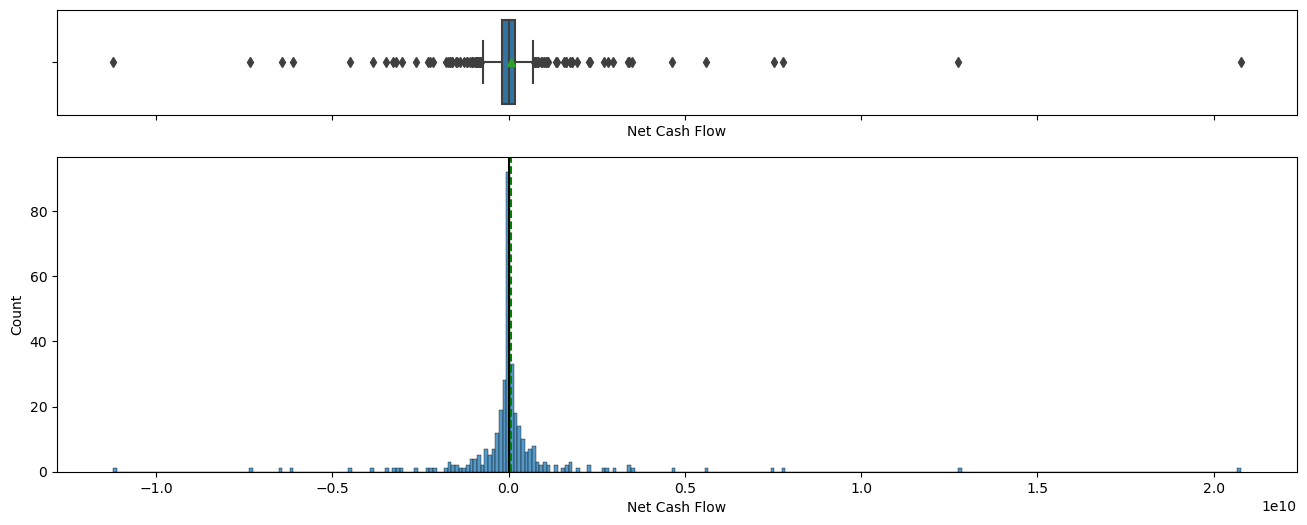

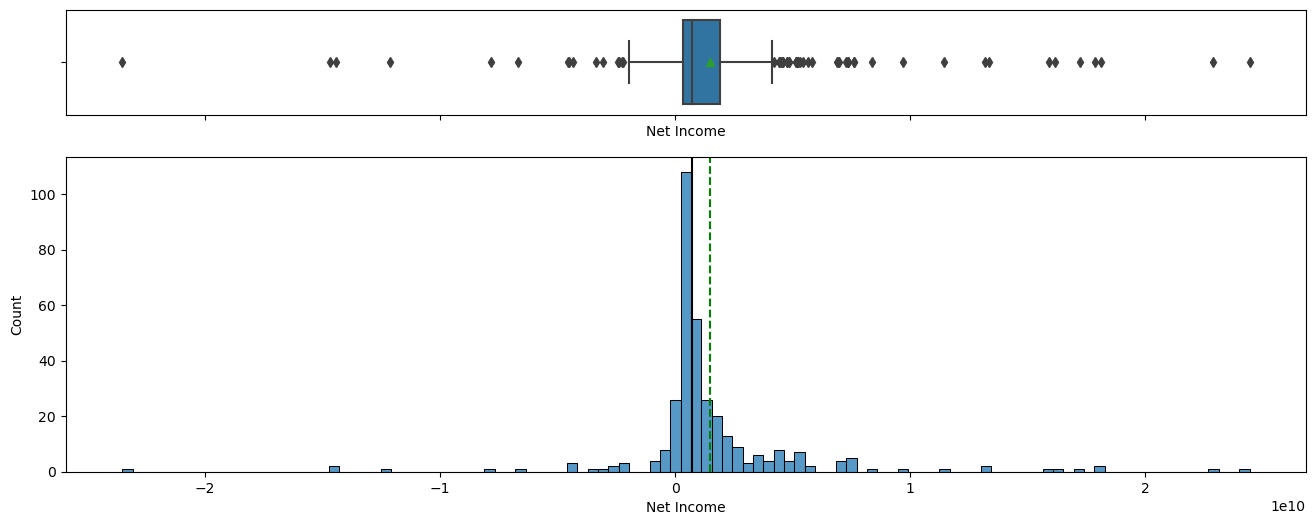

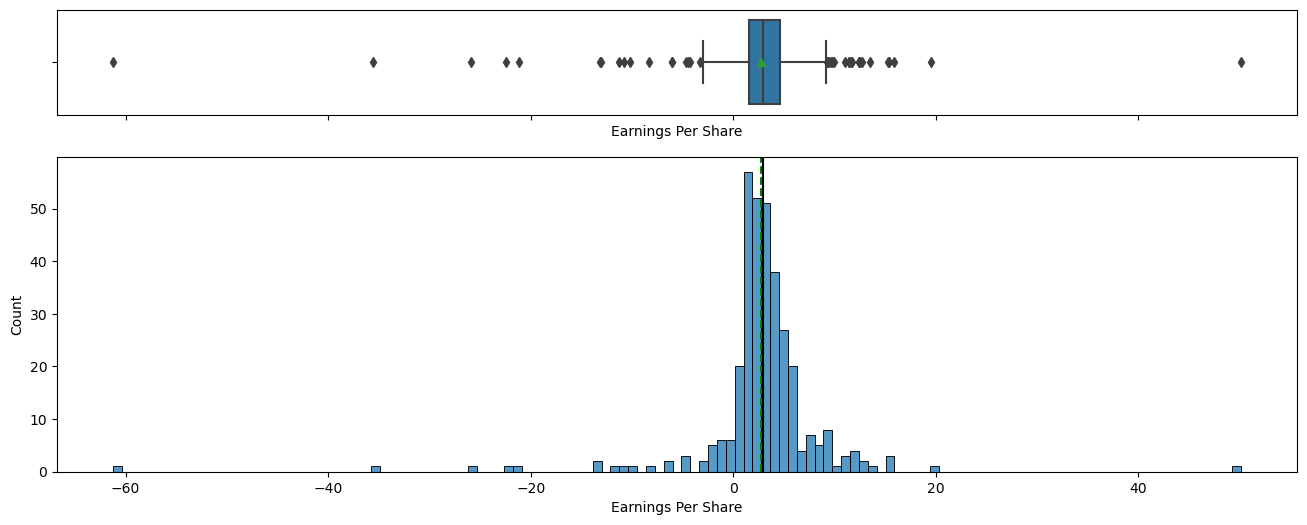

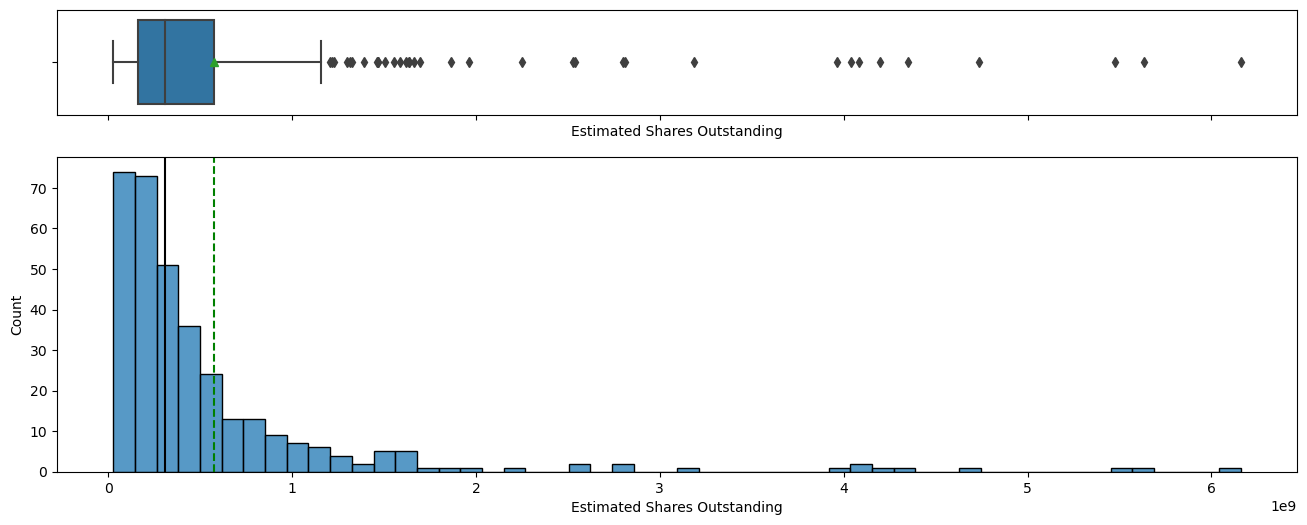

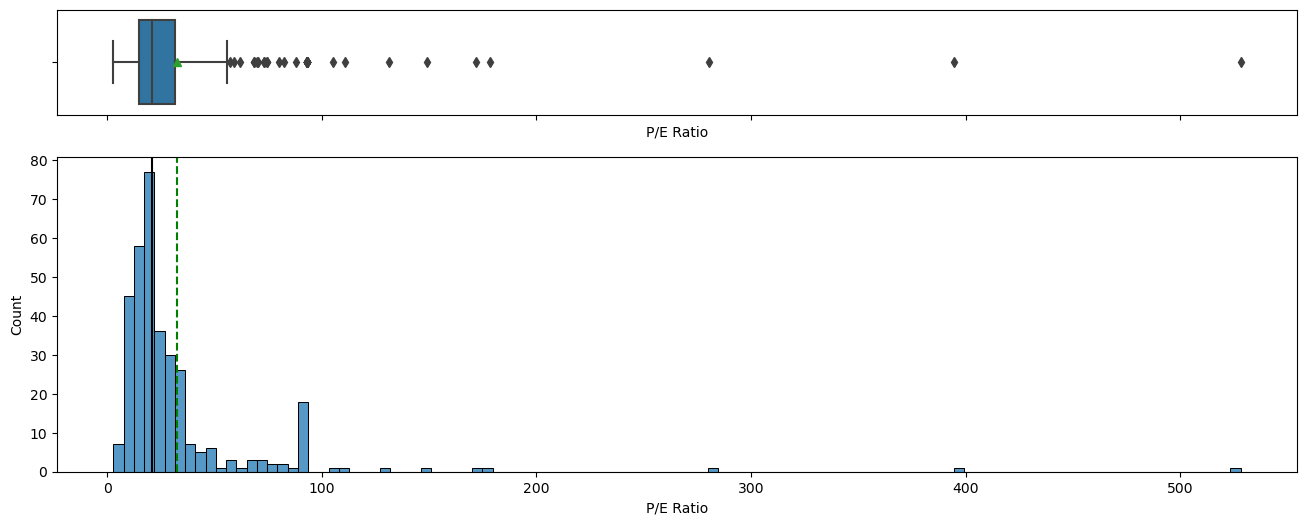

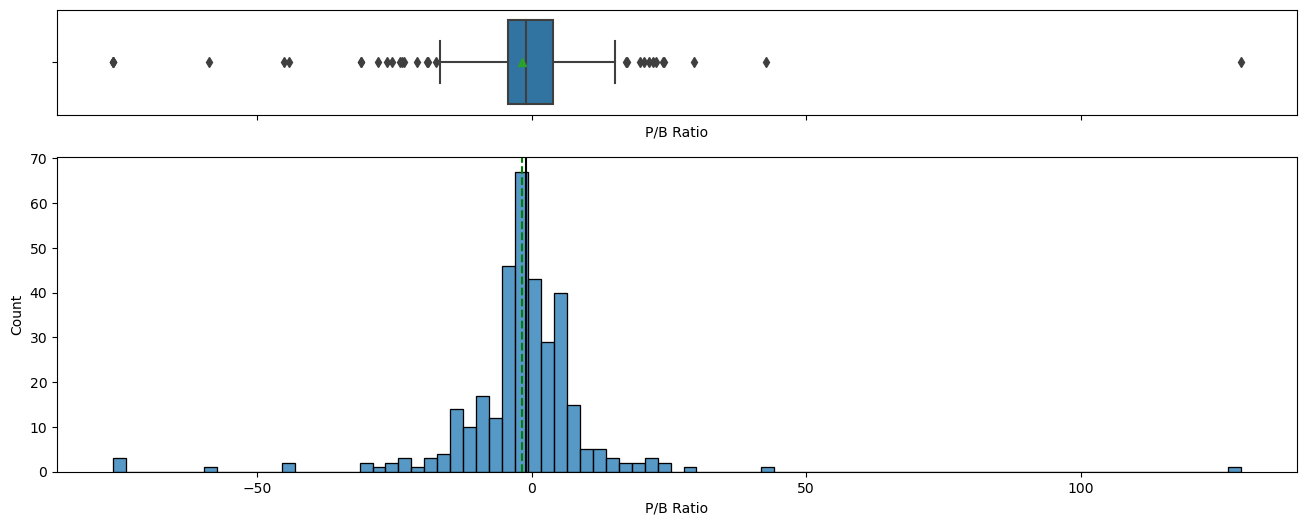

In [41]:
#create list of columns with numerical variables
num_col = df.select_dtypes(include=np.number).columns.tolist()

#display histograms and boxplots for all numerical columns
for col in num_col:
    histogram_boxplot(df, col)

Current price

The distribution is heavily right skewed, with 49 of the 340 stocks having twice the median value of all stocks
As expected, no stock is listed at less of less than 0 dollars
Price change

The distribution is biased towards lower volatilities, but long tails do exist both for positive and negative price changes
The most volatile stocks show as low as a 47% decrease to as high as a 55% increase over 13 weeks
Volatility

As expected, the distribution of standard deviations is right skewed and not normal
Cash Ratio / ROE

As expected, both distributions are heavily right skewed and no stock is listed with either metric with a value of less than 0
For example, 24 stocks are listed with returns on equity of less than 5 and 25 stocks are listed with returns of over 100 percent
Net Income / EPS

As expected, net income is shown to be right skewed with both long positive and negative tails
I.e., most companies generate meager profits, but some are failing and some are highly successful
32 companies within the dataset are showing a net income of less than 0 dollars
EPS, as a derivative of Net Income, shows a similar distribution, with most showing low positive values and a few stocks (34) showing negative values
Estimated shares outstanding

The distribution is highly right skewed, but no stock has a value of outstanding shares that is unrealistic
P/E and P/B Ratio

The distribution of P/E ratios is highly right skewed
Interestingly, no stock shows a negative ratio, even though several stocks have a negative EPS and no stock stock has a price listed of less than 0
The distribution for P/B ratios is mostly centered around 0 but with long positive and negative
For example, 175 of the 340 total stocks are shown to below the 25th percentile and above the 75th percentile and
Additionally, 31 of the stocks are outliers
Conclusions
As expected, stocks offer uncertain returns with high upsides, mostly modest returns, and the omnipresent possibility that the value of the stock may become worthless (i.e., the company goes bankrupt)
All of these variables contain a few or several outliers; however, none of these values appear to be unrealistic given the nature of stock prices and historical expectations

## The stocks of which economic sector have seen the maximum price increase on average?



In [42]:
df.groupby('GICS Sector')['Price Change'].mean().sort_values()


GICS Sector
Energy                        -10.23
Utilities                       0.80
Industrials                     2.83
Financials                      3.87
Materials                       5.59
Consumer Discretionary          5.85
Real Estate                     6.21
Telecommunications Services     6.96
Information Technology          7.22
Consumer Staples                8.68
Health Care                     9.59
Name: Price Change, dtype: float64

Stocks within the health care sectors have shown the highest average price increase over the preeceding period


How are the different variables correlated with each other?



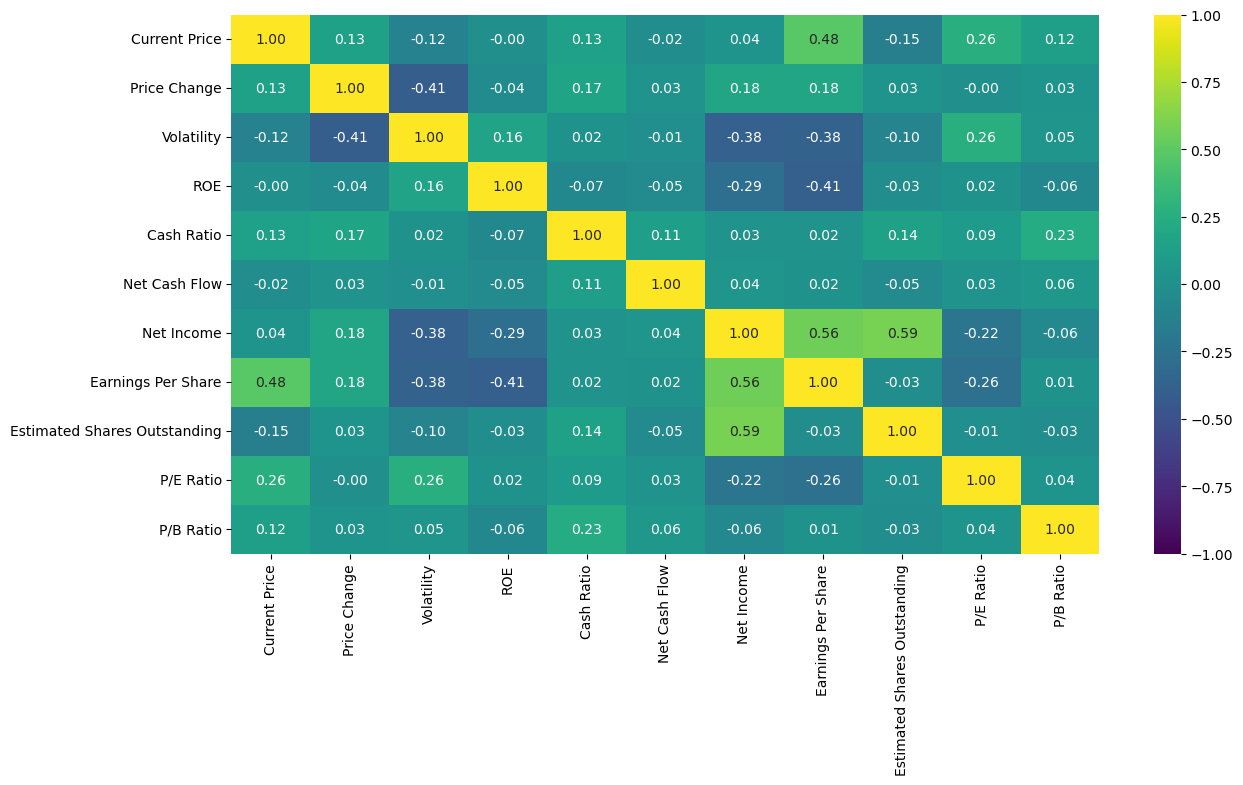

In [44]:
#create correlation heat map for numerical variables
plt.figure(figsize=(14, 7))
sns.heatmap(
    df[num_col].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='viridis'
)
plt.show()

Several variables are moderately correlated (+/- .40) with one another
Volatility is negatively correlated with price change, i.e., as a stock becomes more volatile, its price is likely dropping
Net income is negatively correlayed with volatility, i.e. as a company generates higher net income its price is likely less volatile
Net income is also positively correlated with earnings per share (EPS) and estimated shares outstanding
EPS is positively correlated with current price, i.e. as a company's EPS rises, its prices is also highly likely to increase
EPS is also negatively correlated with ROE, i.e. as a company generates more equity for shareholders, an equivalent amount of net income the following periods will generate a lower return

In [45]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)


GICS Sector
Information Technology        149.82
Telecommunications Services   117.00
Health Care                   103.78
Financials                     98.59
Consumer Staples               70.95
Energy                         51.13
Real Estate                    50.11
Consumer Discretionary         49.58
Materials                      41.70
Industrials                    36.19
Utilities                      13.62
Name: Cash Ratio, dtype: float64

IT and Telecommunications sectors, both relatively newer and unregulated industries, are able to generate significantly higher average cash ratios than their peer sectors
Utilities, a highly regulated industry, generates the lowest average cash ratios of all sectors

In [46]:
## P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [47]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)


GICS Sector
Energy                        72.90
Information Technology        43.78
Real Estate                   43.07
Health Care                   41.14
Consumer Discretionary        35.21
Consumer Staples              25.52
Materials                     24.59
Utilities                     18.72
Industrials                   18.26
Financials                    16.02
Telecommunications Services   12.22
Name: P/E Ratio, dtype: float64

Energy companies have the highest average P/E ratios of all sectors by a considerable margin, with telecoms having the lowest average P/E ratios


K-means Clustering¶


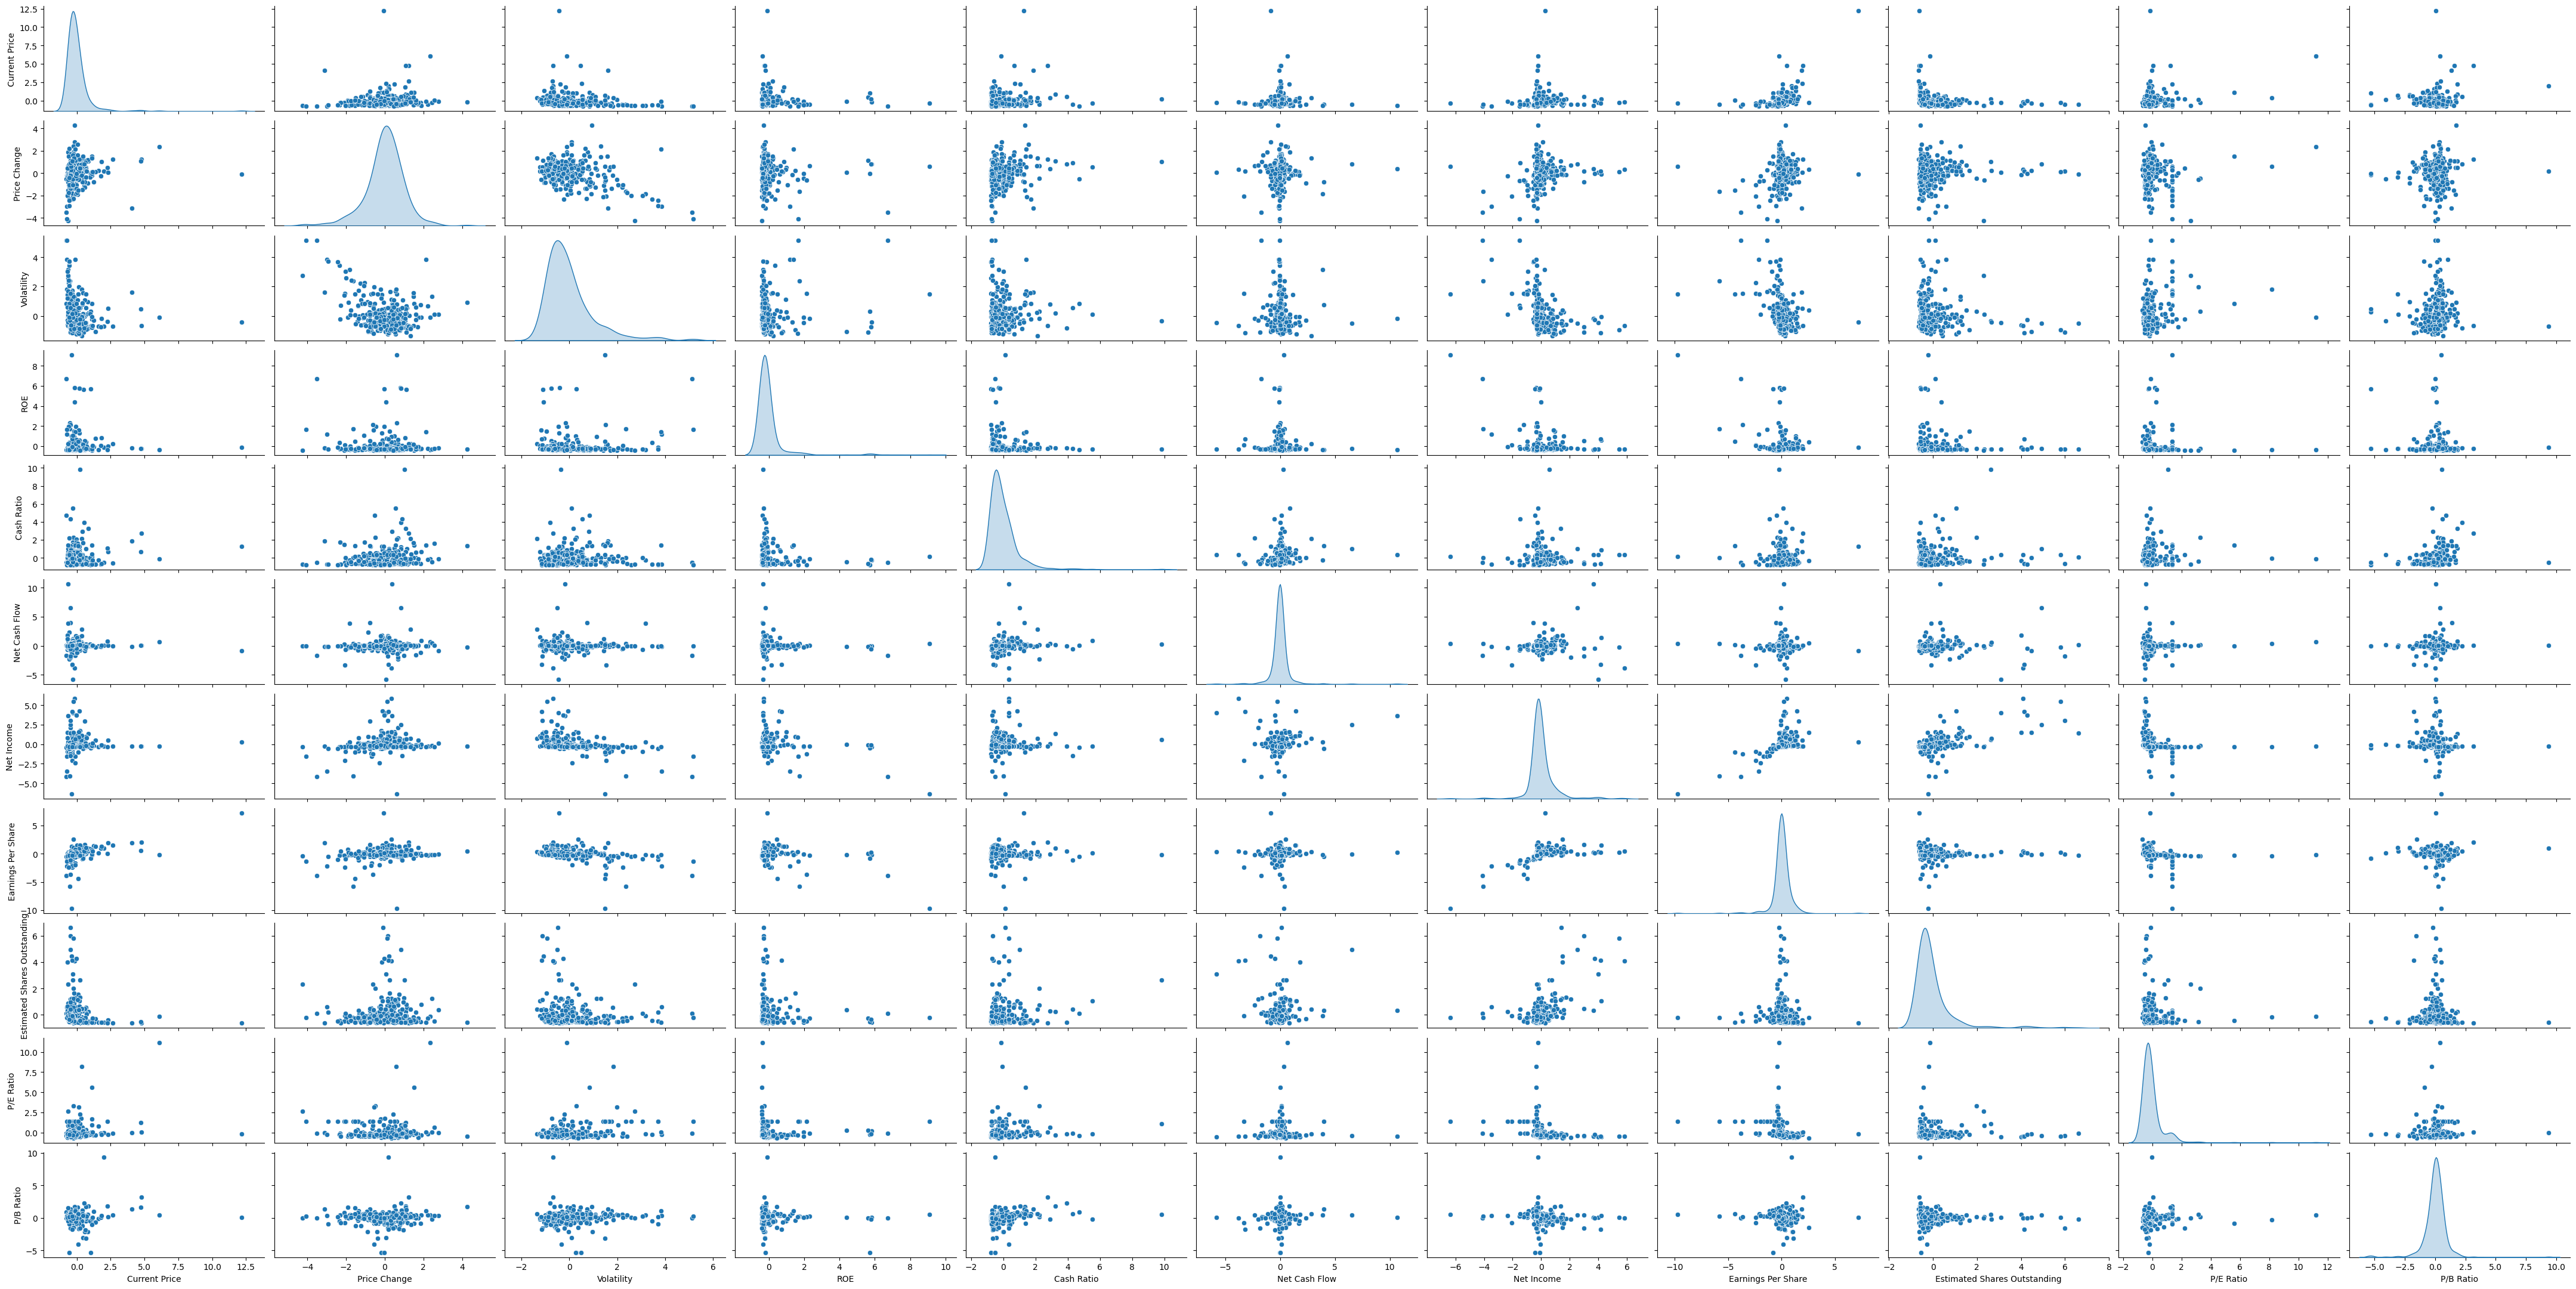

In [48]:
#scale the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)
#create a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
#create pairplot for scaled dataframe
sns.pairplot(subset_scaled_df, height=2,aspect=2 , diag_kind='kde')
plt.show()

In [49]:
#print average distortions for range of kmeans models fitted to scaled dataset
clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2683105560042285
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.114776817875776
Number of Clusters: 6 	Average Distortion: 2.075958522589785
Number of Clusters: 7 	Average Distortion: 2.0156803260709855
Number of Clusters: 8 	Average Distortion: 1.980082885371448
Number of Clusters: 9 	Average Distortion: 1.9410825258641804
Number of Clusters: 10 	Average Distortion: 1.8857818945260303


In [50]:
#fit KMeans model and use visualizaer to indicate optimal K value
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 11), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure
plt.show()

NameError: name 'KElbowVisualizer' is not defined

In [ ]:
#fit KMeans model and provide silhouette scores for range of k clusters
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

#show scores in line graph
plt.plot(cluster_list, sil_score)
plt.show()

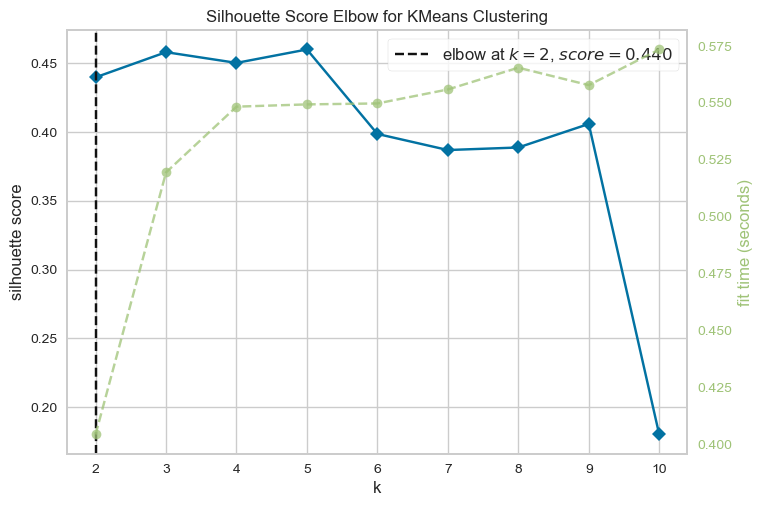

In [56]:
#fit KMeans model and use visualizaer to indicate optimal K value
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure
plt.show()

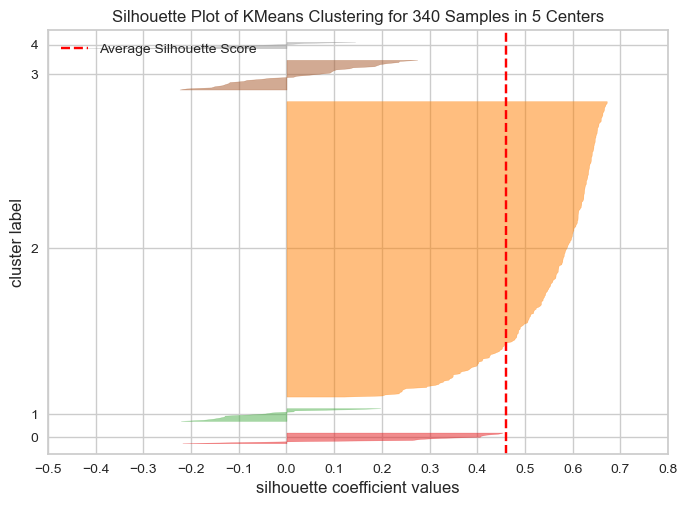

In [57]:
#find optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=42))
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

Between the Elbow and Silhouette plots, the number of clusters with the best performance appears to be 5


In [58]:
#create kmeans cluster model
kmeans = KMeans(n_clusters=5, random_state=42)

#fit model to scaled dataset
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=42)

Cluster Profiling¶


In [59]:
# adding kmeans cluster labels to the original dataframe
df["KMeans_clusters"] = kmeans.labels_

In [60]:
#group dataset by kmeans cluster labels
cluster_profile = df.groupby("KMeans_clusters").mean()

#add counts for number of stocks in each cluster
cluster_profile["Count"] = (
    df.groupby("KMeans_clusters")["Current Price"].count().values
)

In [61]:
cluster_profile.style.highlight_max(color="lightblue", axis=0)


In [62]:
# print the names of the companies in each cluster
for cl in df["KMeans_clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["KMeans_clusters"] == cl]["Security"].unique().to_list())
    print()

In cluster 2, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Allegion', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'BIOGEN IDEC Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar

In [63]:
#print number of stocks within each sector for all of the clusters
for k in range(0,df['KMeans_clusters'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(df[df['KMeans_clusters']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Financials                     3
Consumer Discretionary         2
Health Care                    2
Telecommunications Services    2
Consumer Staples               1
Energy                         1
Industrials                    0
Information Technology         0
Materials                      0
Real Estate                    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Health Care                    4
Information Technology         4
Consumer Discretionary         1
Consumer Staples               1
Energy                         1
Financials                     1
Telecommunications Services    1
Industrials                    0
Materials                      0
Real Estate                    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:
Industrial

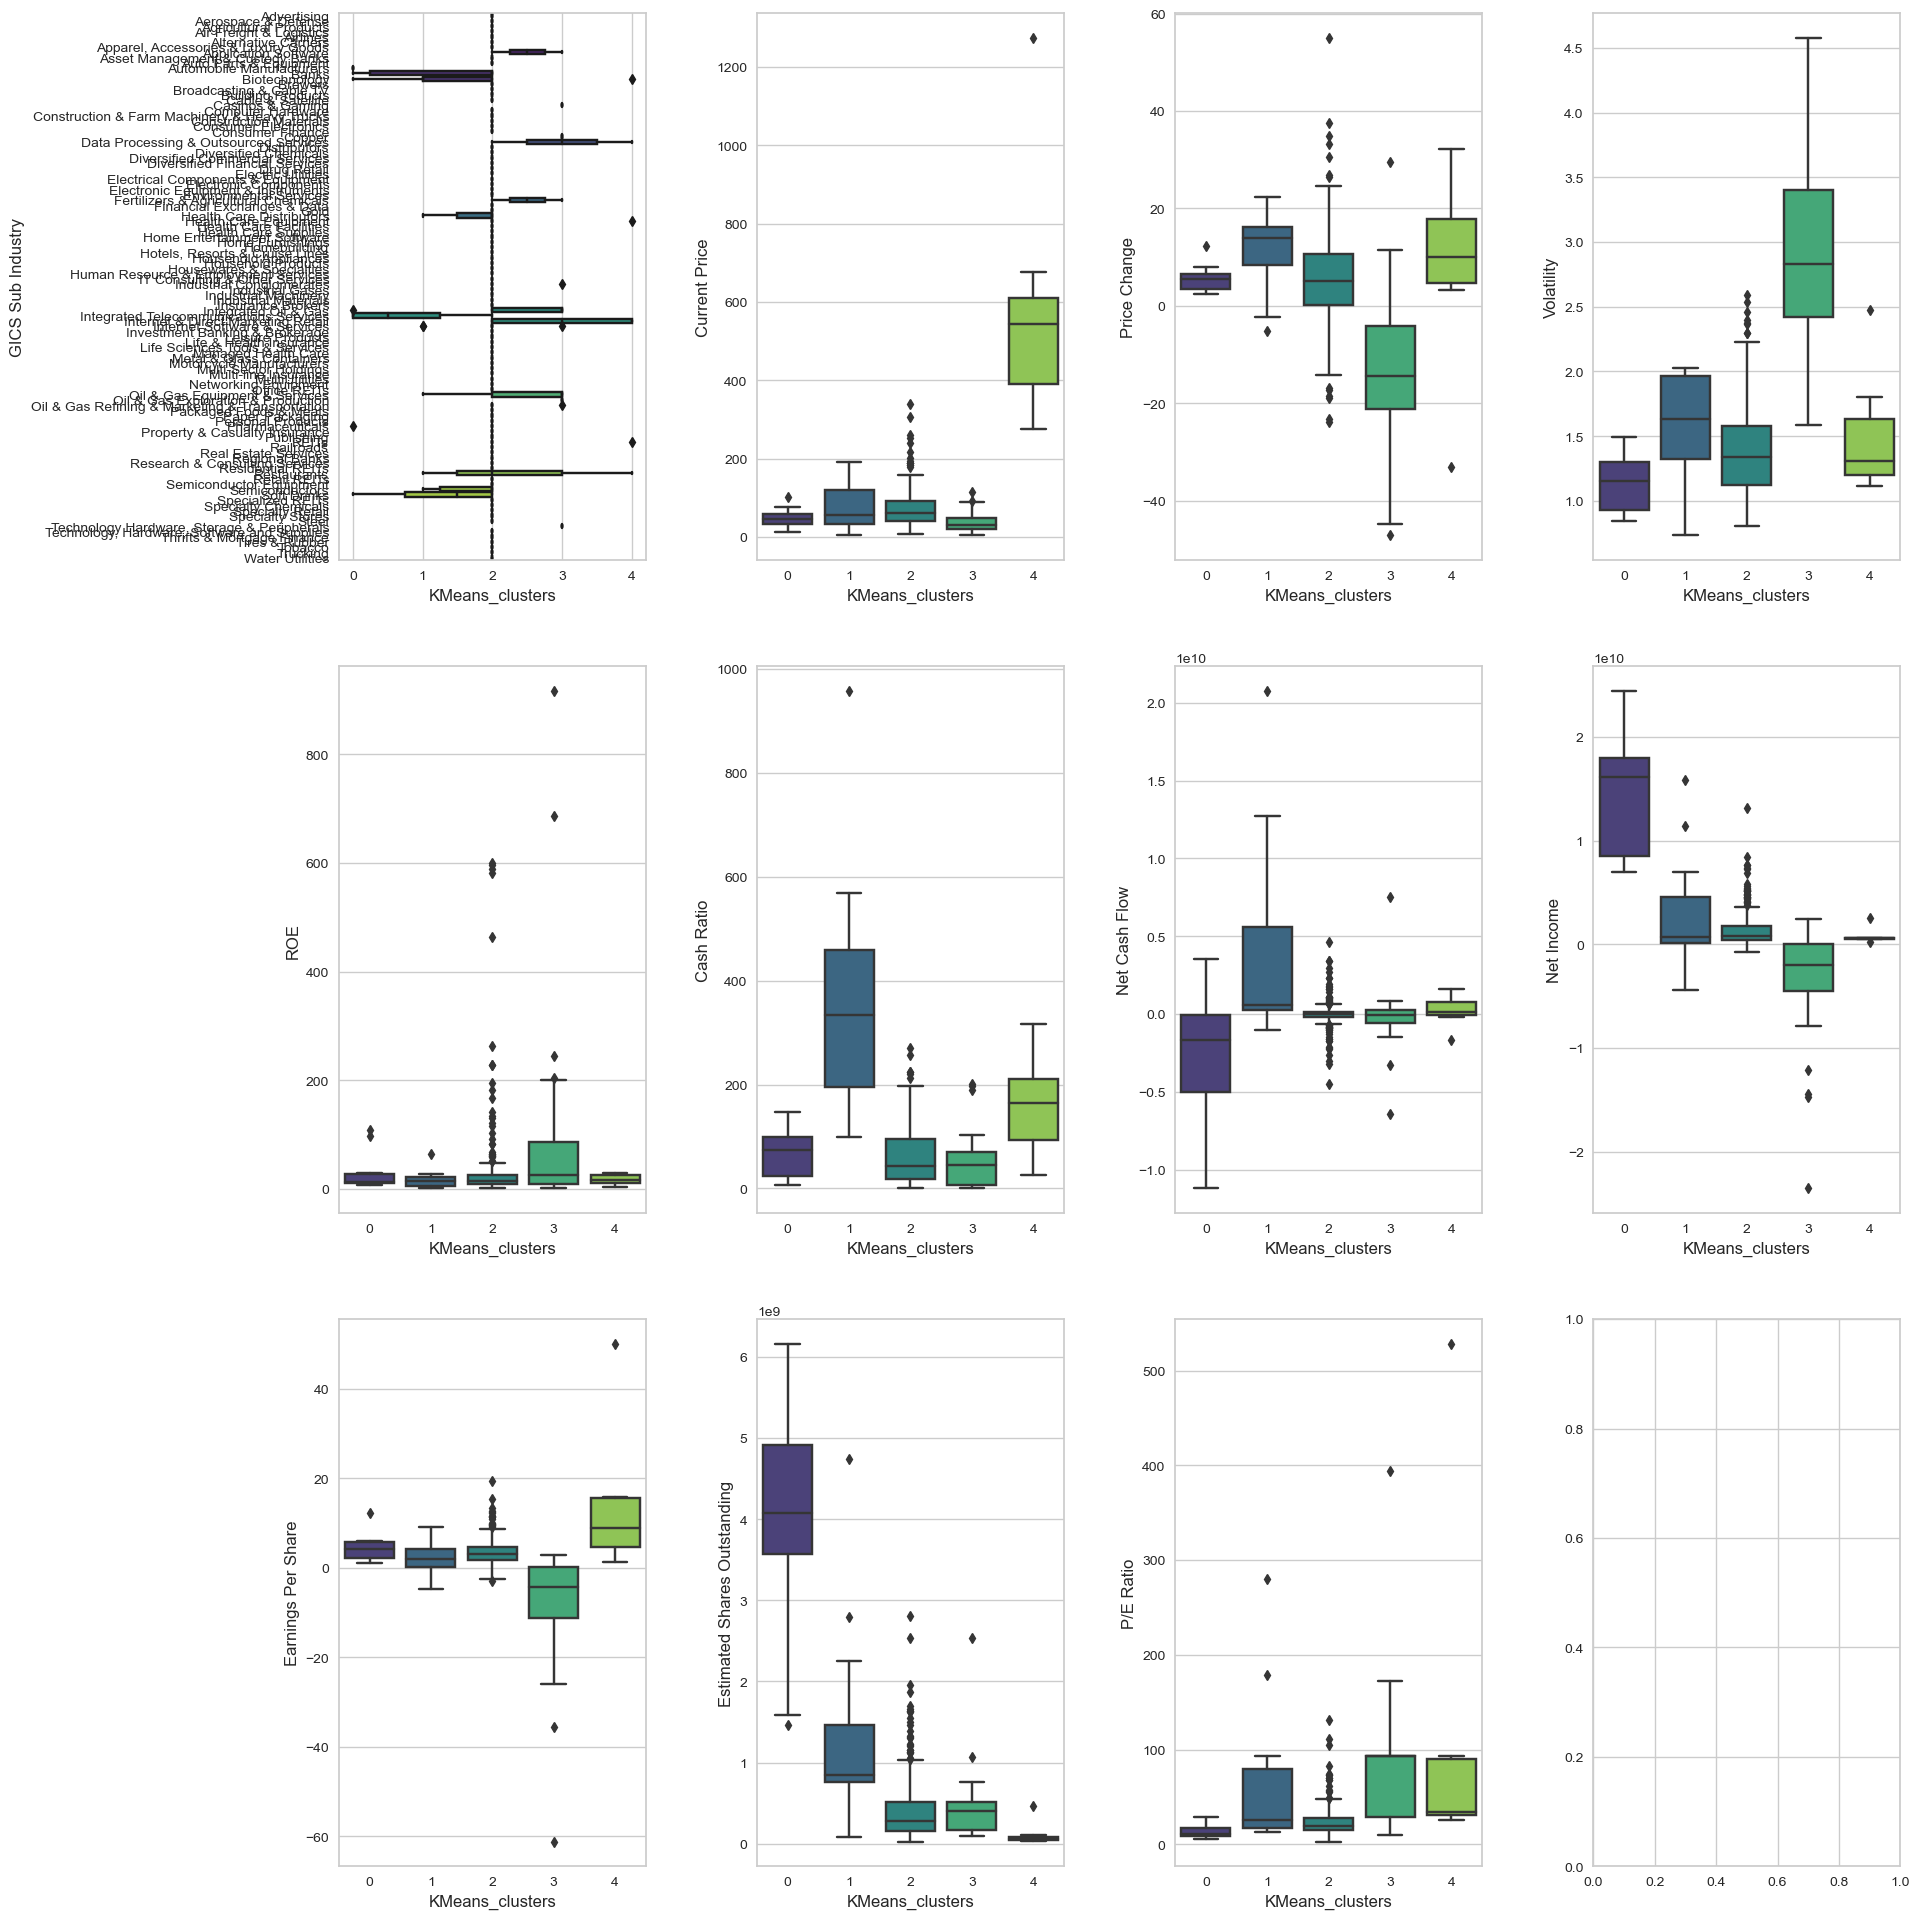

In [64]:
# show boxplots of numerical variables for each K-Means cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df,
                y=df.columns[3+counter],
                x="KMeans_clusters",
                palette="viridis"
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

KMeans Clusters
Cluster 0 - Large Market Capitalization / Dow Jones Industrial Average

11 stocks, comprised mostly of stocks within the Financials, Health Care, Information Technology (IT), and Consumer Discretionary sectors
Companies within this cluster have:
Low volatility
Most of the companies with the highest outflows of cash
The highest net incomes
The highest number of shares outstanding
Cluster 1 - "Cash is King"

13 stocks, comprised mostly of stocks within the Healthcare and IT sectors
Companies within this cluster have:
Moderate volatility
Mostly profitable
Most of the highest cash ratios and cash inflows
Cluster 2 - S&P 500 / Diversification

280 stocks (~84% of all stocks in the dataset) drawn from all sectors present in the dataset
Companies within this cluster have:
Low P/E ratios
Most of the outliers on negative P/B ratios
Cluster 3 - "Ride the Energy Rollercoaster" portfolio / Growth mindset

29 stocks, a vast majority of which are from the Energy sector
Companies within this cluster have:
Low stock prices, but high ROE
High beta
Most of the most volatile stocks, especially those with outliers in price decreases
Mostly negative net incomes and earnings per share
Cluster 4 - High Earnings for a High Price

7 stocks, comprised mostly of stocks from the Health Care and Consumer Discretionary sectors
Companies within this cluster have:
Most of stocks with the highest prices
Favorable cash ratios
The most favorable P/B ratios
Most of the highest earnings-per-share

Hierarchical Clustering¶


In [65]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, round(c,4)
            )
        )
        print(" ")
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232.
 
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873.
 
Cophenetic correlation for Euclidean distance and average linkage is 0.9423.
 
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8694.
 
Cophenetic correlation for Chebyshev distance and single linkage is 0.9063.
 
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5989.
 
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338.
 
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127.
 
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259.
 
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925.
 
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247.
 
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.8708.
 
Cophenetic correlation for Cityblock dist

In [66]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9423, which is obtained with Euclidean distance and average linkage.


In [67]:
# list of linkage methods for euclidean distance metric
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print(
            "Cophenetic correlation for Euclidean distance and {} linkage is {}.".format(
                lm, round(c,4)
            )
        )
    print(" ")
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232.
 
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873.
 
Cophenetic correlation for Euclidean distance and average linkage is 0.9423.
 
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9314.
 
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101.
 
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8694.
 


In [68]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9423, which is obtained with average linkage.


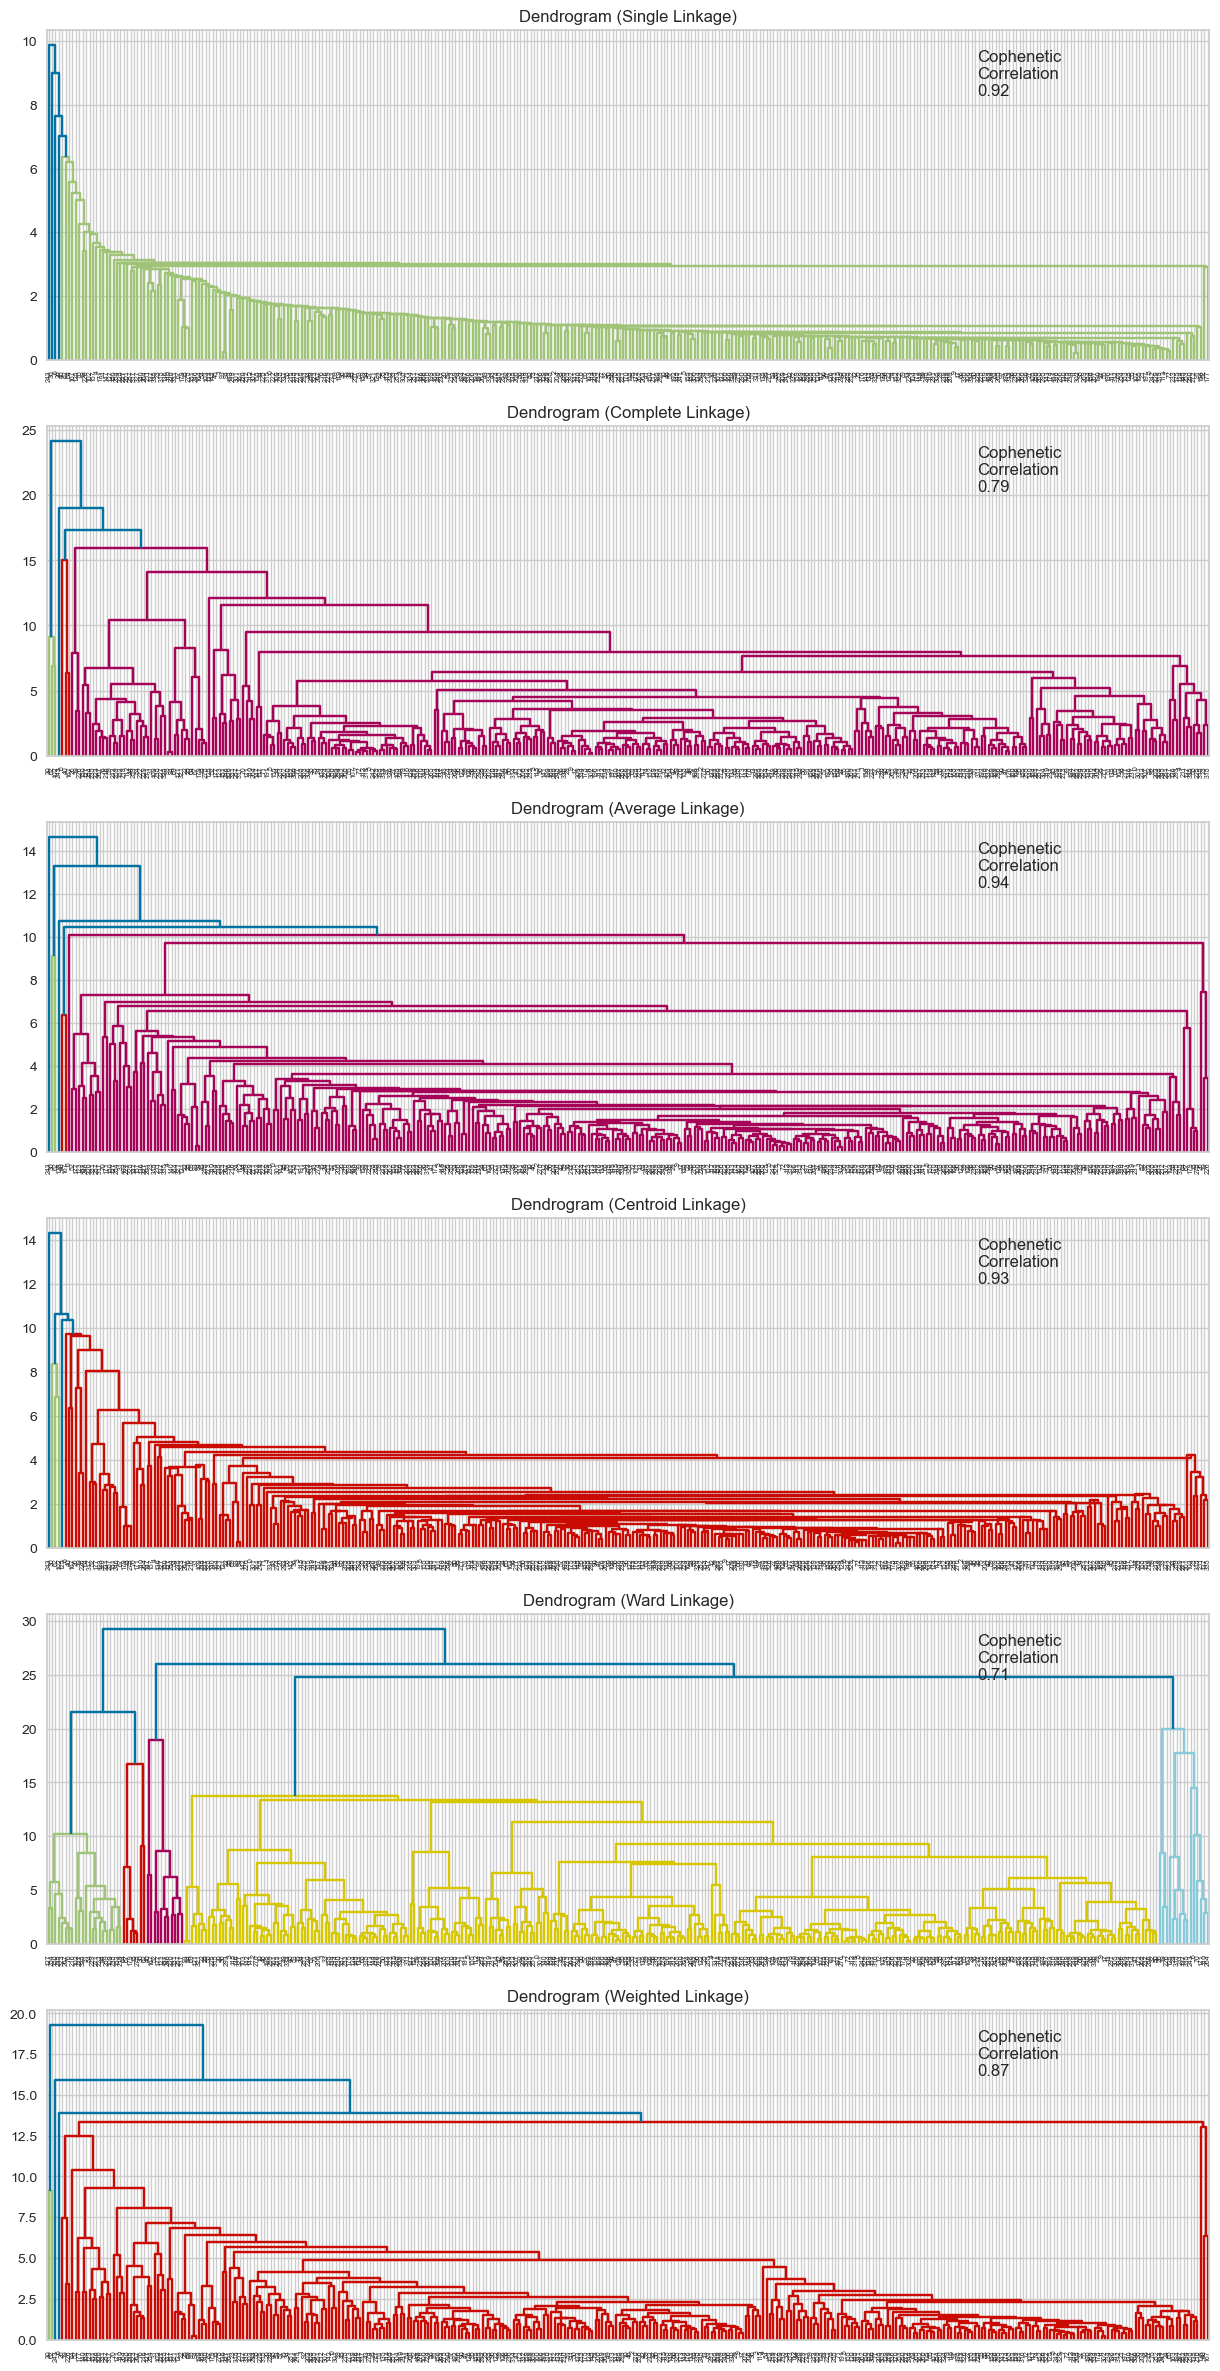

In [69]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

The cophenetic correlation is highest for average and centroid linkage methods, but the dendrogram for average appears to provide better clusters
5 appears to be the appropriate number of clusters for the average linkage method

In [70]:
Z = linkage(subset_scaled_df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

In [71]:
hierarchy = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
hierarchy.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [72]:
AgglomerativeClustering(linkage='average', n_clusters=5)


AgglomerativeClustering(linkage='average', n_clusters=5)

Cluster Profiling¶


In [73]:
df_hierarchy = df.copy()
df_hierarchy.drop("KMeans_clusters", axis=1, inplace=True)
df_hierarchy['HC_clusters'] = hierarchy.labels_

In [74]:
#group dataset by Hierarchical clusters
cluster_profile_h = df_hierarchy.groupby("HC_clusters").mean()

#add counts for number of stocks in each cluster
cluster_profile_h["Count"] = (
    df_hierarchy.groupby("HC_clusters")["Current Price"].count().values
)

#show dataframe with maximum values for each metric highlighted
cluster_profile_h.style.highlight_max(color="lightblue", axis=0)

There are 2 clusters of one company, 2 clusters of two companies, and a single cluster of the remaining 334 companies
The clustering of these companies does not solve the business problem at hand, because the clusters do not have enough variability

In contrasts, the dendrogram for Ward linkage appears to provide better clustering, with 5 appearing to be the appropriate number of clusters



In [75]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

AgglomerativeClustering(n_clusters=5)


Cluster Profiling¶


In [76]:
subset_scaled_df["HC_clusters"] = HCmodel.labels_
df_hierarchy["HC_clusters"] = HCmodel.labels_
#group dataset by Hierarchical clusters
cluster_profile_h = df_hierarchy.groupby("HC_clusters").mean()

#add counts for number of stocks in each cluster
cluster_profile_h["Count"] = (
    df_hierarchy.groupby("HC_clusters")["Current Price"].count().values
)

#show dataframe with maximum values for each metric highlighted
cluster_profile_h.style.highlight_max(color="lightblue", axis=0)

In [77]:
# print the names of the companies in each cluster
for cl in df_hierarchy["HC_clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_hierarchy[df_hierarchy["HC_clusters"] == cl]["Security"].unique().to_list())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'BIOGEN IDEC Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 

In [78]:
# print the number of stocks in each GICS sector for each cluster
for k in range(0,df_hierarchy['HC_clusters'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(df_hierarchy[df_hierarchy['HC_clusters']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Health Care                    5
Information Technology         4
Consumer Discretionary         3
Consumer Staples               1
Real Estate                    1
Telecommunications Services    1
Energy                         0
Financials                     0
Industrials                    0
Materials                      0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Consumer Staples               2
Energy                         2
Consumer Discretionary         1
Financials                     1
Industrials                    1
Health Care                    0
Information Technology         0
Materials                      0
Real Estate                    0
Telecommunications Services    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:
Financials

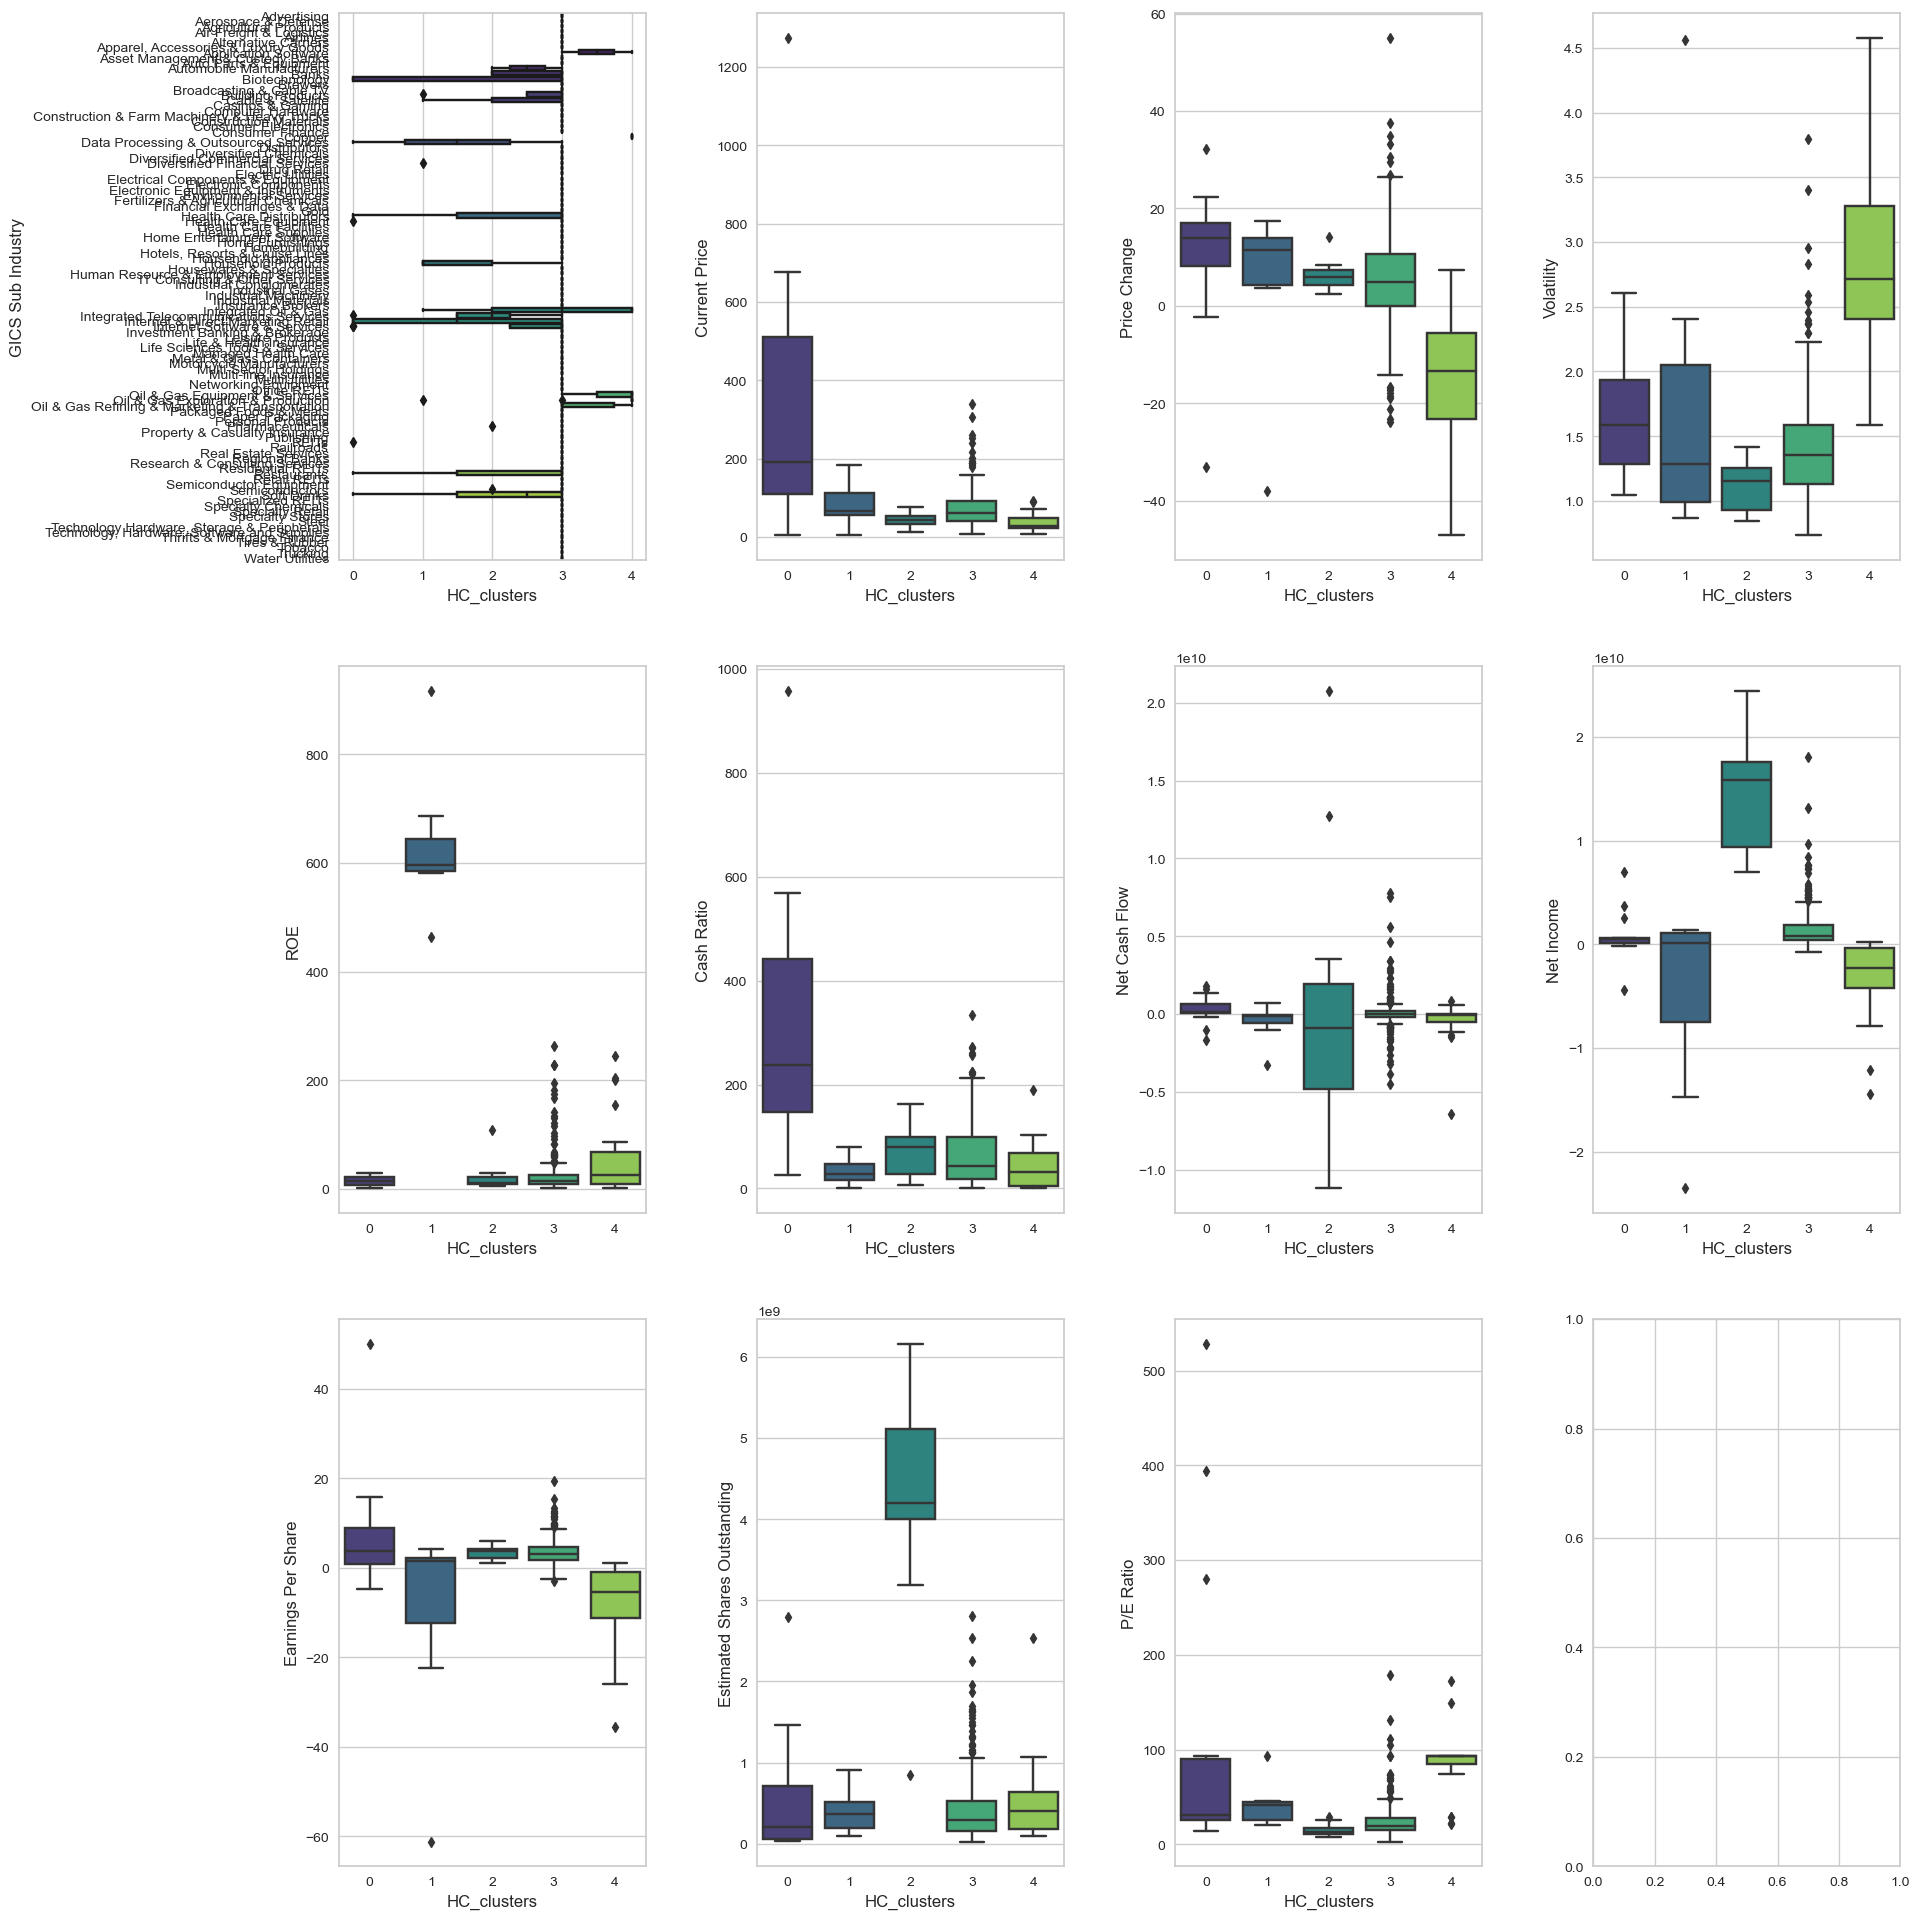

In [79]:
# show boxplots of numerical variables for each Hierarchical cluster
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df_hierarchy,
                y=df_hierarchy.columns[3+counter],
                x="HC_clusters",
                palette="viridis"
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

Hierarchical Clusters
Cluster 0 - Growth for a Price

15 stocks, comprised mostly of stocks within the Health Care, Information Technology (IT), and Consumer Discretionary sectors
Companies within this cluster have:
Most of stocks with the highest prices
Significant outliers in price-to-equity ratio
The most favorable price-to-book (P/B) ratios
Most of the highest cash ratios
Cluster 1 - Short-term Poor, Long-term Rich

7 stocks, comprised mostly of stocks within the Consumer Staples and Energy sectors
Companies within this cluster have:
The highest returns-on-equity
The lowest net incomes
Mostly negative earnings per share
Cluster 2- DJIA

11 stocks, comprised mostly of stocks within the Financials and Telecommunications sectors
Companies within this cluster have:
Most of the companies with the highest inflows and outflows of cash
The highest net incomes
The highest number of shares outstanding
Cluster 3 - Diversification

285 stocks (~84% of all stocks in the dataset) drawn from all sectors present in the dataset
Companies within this cluster have:
Most of outliers in price increases and some of the outliers in price decreases
Some of outliers in cash inflows and outflows
Most of the outliers in P/B ratio
Cluster 4 - Energy-specific portfolio

22 stocks, a vast majority of which are in the Energy sector
Companies within this cluster have:
Most of the most volatile stocks, especially those with outliers in price decreases
Mostly negative net incomes and earnings per share
K-means vs Hierarchical Clustering
Which clustering technique took less time for execution?

Both the KMeans model and the Agglomerative Clustering model fit the dataset within ~0.1s
Which clustering technique gave you more distinct clusters, or are they the same? How many observations are there in the similar clusters of both algorithms?

Both algorithms give similar clusters, with a single cluster of a majority of the stocks and the remaining four clusters containing 7-29 stocks
How many clusters are obtained as the appropriate number of clusters from both algorithms?

For both algorithms, 5 clusters provided distinct clusters with sufficient observations in each to reasonably differentiate which "type" of stock is representative of the cluster
Differences or similarities in the cluster profiles from both the clustering techniques

Both algorithms yielded similar clusters based on the outliers within the 11 variables

Actionable Insights and Recommendations
Trade&Ahead should first identify the financial goals, risk tolerance, and investment behaviors of their clilents, then recommend a cluster as a potential portfolio of stocks which will fit these needs
However, many of these clusters, based on the characteristics of the stocks within them, are essentially substitutes for standard indexes, such as the Dow Jones Industrial Average and the S&P 500, which could more easily achieve these goals
Alternatively, Trade&Ahead could use these clusters as an starting point for further financial statement analysis, particularly which individual stocks do not fit the "profile" of the cluster
Assuming selecting individual stocks is a component of a client's investment strategy, Trade&Ahead may then be able to identify stocks which should outperform its peers (i.e., price will rise = buy recommendation) or likely fall behind its peers (i.e., price will fall = sell recommendation)